# Prediction of Appointment No-Show using Classification Models

Patients make appointments at clinics or hospitals to be checked by a doctor. Some of the patients do not show up for their appointments. This results in loss of valuable resources in terms of physician time and staffing allocation which could have been used more productively. we will prediction if the person shows up or not using a few classitfication algorithms.

In [4]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import f1_score

Populating the interactive namespace from numpy and matplotlib


In [5]:
import pandas as pd


df_appointments = pd.read_csv('Data/appointment.csv')
df_appointments.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


## EDA

In [6]:
df_appointments.shape

(110527, 14)

In [7]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## Feature Engineering

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64


<AxesSubplot:>

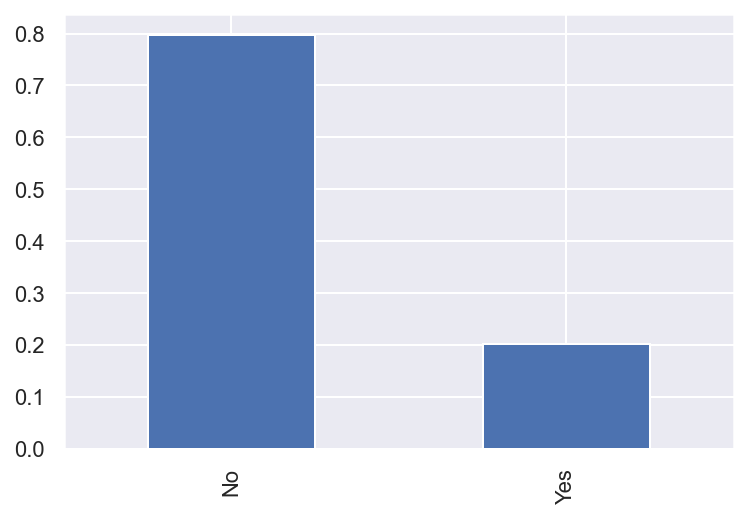

In [8]:
# ترسم التارقت واشوف بالانس او لا 
target_show = df_appointments['No-show'].value_counts(normalize=True) 
print(target_show)
#target_pcts.plot(kind='bar')
target_show.plot(kind='bar')

In [9]:
df_appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
df_appointments['No-show'] = df_appointments['No-show'].str.replace('No', '1')
df_appointments['No-show'] = df_appointments['No-show'].str.replace('Yes', '0')
df_appointments.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,9.598510e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.336880e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449830e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,5.639470e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,1
9,7.812460e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1


In [11]:
df_appointments['Gender'] = df_appointments['Gender'].str.replace('M', '1')
df_appointments['Gender'] = df_appointments['Gender'].str.replace('F', '0')
df_appointments.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589980e+14,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262960e+12,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679510e+11,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841190e+12,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,9.598510e+13,5626772,0,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,1
6,7.336880e+14,5630279,0,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,0
7,3.449830e+12,5630575,0,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,0
8,5.639470e+13,5638447,0,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,1
9,7.812460e+13,5629123,0,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,1


the distribution of our labels and know that we're working with an **imbalanced classification task**

In [12]:
df_appointments['No-show'].astype('int') 

0         1
1         1
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: No-show, Length: 110527, dtype: int64

1    0.798067
0    0.201933
Name: No-show, dtype: float64


<AxesSubplot:>

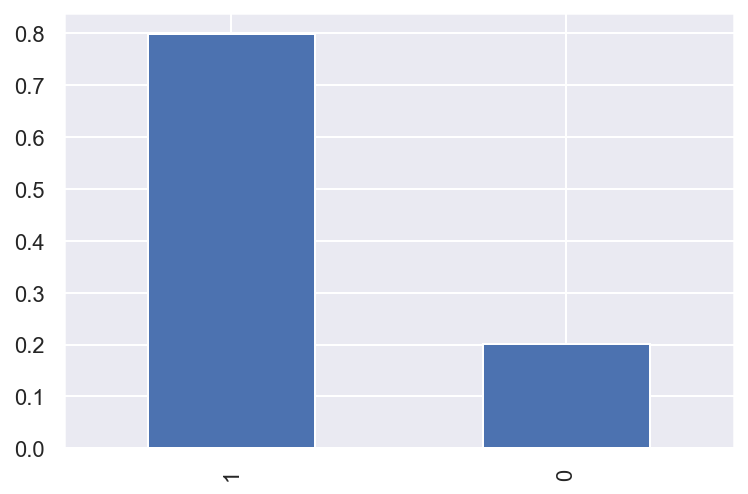

In [13]:
# ترسم التارقت واشوف بالانس او لا 
target_show = df_appointments['No-show'].value_counts(normalize=True) 
print(target_show)
#target_pcts.plot(kind='bar')
target_show.plot(kind='bar')

In [14]:
df_appointments.ScheduledDay=df_appointments.loc[:].ScheduledDay.map(lambda x: str.split(x, "T")[0])
df_appointments.AppointmentDay=df_appointments.loc[:].AppointmentDay.map(lambda x: str.split(x, "T")[0])

In [15]:
df_appointments['ScheduledDay'] = pd.to_datetime(df_appointments['ScheduledDay'])
df_appointments['AppointmentDay'] = pd.to_datetime(df_appointments['AppointmentDay'])

In [16]:
from datetime import date
df_appointments['days'] = df_appointments['AppointmentDay'] - df_appointments['ScheduledDay'] 
df_appointments['days']

0         0 days
1         0 days
2         0 days
3         0 days
4         0 days
           ...  
110522   35 days
110523   35 days
110524   41 days
110525   41 days
110526   41 days
Name: days, Length: 110527, dtype: timedelta64[ns]

In [17]:
df_appointments['days'] = df_appointments['AppointmentDay'] - df_appointments['ScheduledDay']
df_appointments

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days
0,2.987250e+13,5642903,0,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0 days
1,5.589980e+14,5642503,1,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0 days
2,4.262960e+12,5642549,0,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0 days
3,8.679510e+11,5642828,0,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,0 days
4,8.841190e+12,5642494,0,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,1,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,2016-05-03,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,1,35 days
110523,3.596270e+12,5650093,0,2016-05-03,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,1,35 days
110524,1.557660e+13,5630692,0,2016-04-27,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,1,41 days
110525,9.213490e+13,5630323,0,2016-04-27,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,1,41 days


In [18]:
df_appointments = df_appointments.drop(['Neighbourhood'], axis = 1)
df_appointments = df_appointments.drop(['AppointmentDay'], axis = 1)
df_appointments = df_appointments.drop(['ScheduledDay'], axis = 1)


In [19]:
df_appointments

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days
0,2.987250e+13,5642903,0,62,0,1,0,0,0,0,1,0 days
1,5.589980e+14,5642503,1,56,0,0,0,0,0,0,1,0 days
2,4.262960e+12,5642549,0,62,0,0,0,0,0,0,1,0 days
3,8.679510e+11,5642828,0,8,0,0,0,0,0,0,1,0 days
4,8.841190e+12,5642494,0,56,0,1,1,0,0,0,1,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,56,0,0,0,0,0,1,1,35 days
110523,3.596270e+12,5650093,0,51,0,0,0,0,0,1,1,35 days
110524,1.557660e+13,5630692,0,21,0,0,0,0,0,1,1,41 days
110525,9.213490e+13,5630323,0,38,0,0,0,0,0,1,1,41 days


In [20]:
# convert delta date to int
df_appointments['days'] = (df_appointments.days / np.timedelta64(1,'D')).astype(int)

In [21]:
df_appointments

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days
0,2.987250e+13,5642903,0,62,0,1,0,0,0,0,1,0
1,5.589980e+14,5642503,1,56,0,0,0,0,0,0,1,0
2,4.262960e+12,5642549,0,62,0,0,0,0,0,0,1,0
3,8.679510e+11,5642828,0,8,0,0,0,0,0,0,1,0
4,8.841190e+12,5642494,0,56,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,56,0,0,0,0,0,1,1,35
110523,3.596270e+12,5650093,0,51,0,0,0,0,0,1,1,35
110524,1.557660e+13,5630692,0,21,0,0,0,0,0,1,1,41
110525,9.213490e+13,5630323,0,38,0,0,0,0,0,1,1,41


# Split the data

In [38]:
X = df_appointments.drop(['No-show'], axis = 1)
y = df_appointments['No-show']
#y =pd.DataFrame(y)
y

0         1
1         1
2         1
3         1
4         1
         ..
110522    1
110523    1
110524    1
110525    1
110526    1
Name: No-show, Length: 110527, dtype: object

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [40]:
X_train

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,days
58187,1.328490e+12,5687610,0,25,0,0,0,0,0,0,8
5095,3.881870e+14,5694484,1,62,0,0,0,0,0,0,4
67919,9.118990e+12,5500939,0,65,0,0,0,0,0,0,48
2861,1.843620e+14,5639080,1,41,0,0,0,0,0,0,0
45949,5.783200e+13,5671566,1,61,0,1,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
76820,4.876250e+11,5664593,0,63,0,1,1,0,0,1,5
110268,3.911650e+12,5622779,1,31,0,0,0,0,0,0,36
103694,4.973440e+11,5762864,0,38,0,0,0,0,0,0,6
860,2.623490e+14,5639951,0,18,1,0,0,0,0,0,0


# Baseline


In [41]:
lm1 = LogisticRegression() # setting C very high essentially removes regularization
lm1.fit(X_train, y_train)

LogisticRegression()

In [42]:
lm1.score(X_train, y_train)

0.7977629748589136

In [43]:
lm1.score(X_test, y_test)

0.7992852619198407

# Handling The Class Imbalance Struggle (With Instacart Data)

In [46]:
"""
# Setup - as in the feature engineering notebook: same train/test split on randomly selected groups of users  
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score

df_X = df_appointments
   
np.random.seed(42)
#total_users = df_X['user_id'].unique() 
test_users = np.random.choice(total_users, size=int(total_users.shape[0] * .20))

df_X_tr, df_X_te = df_X[~df_X['user_id'].isin(test_users)], df_X[df_X['user_id'].isin(test_users)]

y_tr, y_te = df_X_tr['in_cart'], df_X_te['in_cart']
X_tr, X_te = df_X_tr.drop(['product_id','user_id','latest_cart','in_cart'],axis=1), \
             df_X_te.drop(['product_id','user_id','latest_cart','in_cart'],axis=1)
             
"""

"\n# Setup - as in the feature engineering notebook: same train/test split on randomly selected groups of users  \nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import f1_score, roc_auc_score\n\ndf_X = df_appointments\n   \nnp.random.seed(42)\n#total_users = df_X['user_id'].unique() \ntest_users = np.random.choice(total_users, size=int(total_users.shape[0] * .20))\n\ndf_X_tr, df_X_te = df_X[~df_X['user_id'].isin(test_users)], df_X[df_X['user_id'].isin(test_users)]\n\ny_tr, y_te = df_X_tr['in_cart'], df_X_te['in_cart']\nX_tr, X_te = df_X_tr.drop(['product_id','user_id','latest_cart','in_cart'],axis=1),              df_X_te.drop(['product_id','user_id','latest_cart','in_cart'],axis=1)\n             \n"

In [52]:
#!conda install -c conda-forge imbalanced-learn

import imblearn.over_sampling

# setup for the ratio argument of RandomOverSampler initialization
n_pos = np.sum(y_train == 1)
n_neg = np.sum(y_train == 0)
ratio = {1 : n_pos * 4, 0 : n_neg}  # n_pos * 4, دبلتها ٤ مرات

# randomly oversample positive samples: create 4x as many 
ROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) 
    
    
""" 
    
X_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train)

lr = LogisticRegression(solver='liblinear') 
lr.fit(X_tr, y_tr)

print('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_te, lr.predict(X_te)), roc_auc_score(y_te, lr.predict_proba(X_te)[:,1]))) 

lr_os = LogisticRegression(solver='liblinear') # lr_os= over samling
lr_os.fit(X_tr_rs, y_tr_rs)

print('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' % \
      (f1_score(y_te, lr_os.predict(X_te)), roc_auc_score(y_te, lr_os.predict_proba(X_te)[:,1])))
"""




"\n\n# randomly oversample positive samples: create 4x as many \nROS = imblearn.over_sampling.RandomOverSampler(sampling_strategy = ratio, random_state=42) \n    \nX_tr_rs, y_tr_rs = ROS.fit_resample(X_train, y_train)\n\nlr = LogisticRegression(solver='liblinear') \nlr.fit(X_tr, y_tr)\n\nprint('Simple Logistic Regression; Test F1: %.3f, Test AUC: %.3f' %       (f1_score(y_te, lr.predict(X_te)), roc_auc_score(y_te, lr.predict_proba(X_te)[:,1]))) \n\nlr_os = LogisticRegression(solver='liblinear') # lr_os= over samling\nlr_os.fit(X_tr_rs, y_tr_rs)\n\nprint('Logistic Regression on Oversampled Train Data; Test F1: %.3f, Test AUC: %.3f' %       (f1_score(y_te, lr_os.predict(X_te)), roc_auc_score(y_te, lr_os.predict_proba(X_te)[:,1])))\n"

In [49]:
y_train

58187     1
5095      1
67919     0
2861      1
45949     1
         ..
76820     1
110268    1
103694    1
860       1
15795     1
Name: No-show, Length: 88421, dtype: object

In [29]:
df_appointments

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,days
0,2.987250e+13,5642903,0,62,0,1,0,0,0,0,1,0
1,5.589980e+14,5642503,1,56,0,0,0,0,0,0,1,0
2,4.262960e+12,5642549,0,62,0,0,0,0,0,0,1,0
3,8.679510e+11,5642828,0,8,0,0,0,0,0,0,1,0
4,8.841190e+12,5642494,0,56,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,0,56,0,0,0,0,0,1,1,35
110523,3.596270e+12,5650093,0,51,0,0,0,0,0,1,1,35
110524,1.557660e+13,5630692,0,21,0,0,0,0,0,1,1,41
110525,9.213490e+13,5630323,0,38,0,0,0,0,0,1,1,41


1    0.798067
0    0.201933
Name: No-show, dtype: float64


<AxesSubplot:>

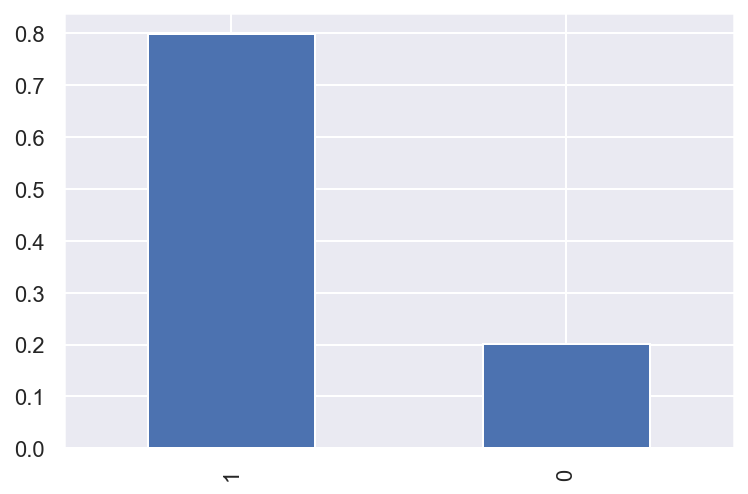

In [32]:
# ترسم التارقت واشوف بالانس او لا 
target_show = df_appointments['No-show'].value_counts(normalize=True) 
print(target_show)
#target_pcts.plot(kind='bar')
target_show.plot(kind='bar')